In [107]:
##importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
## reading dataset
cc=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [109]:
cc

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [110]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [111]:
cc.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


# Data Visualizations

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

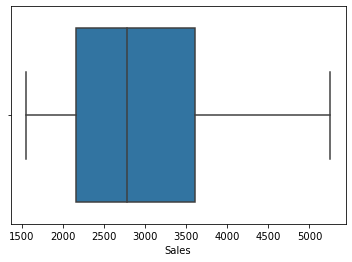

In [112]:
sns.boxplot(cc['Sales'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

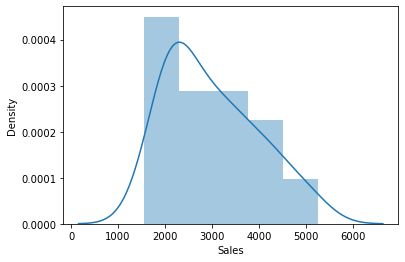

In [113]:
sns.distplot(cc['Sales'])

<AxesSubplot:>

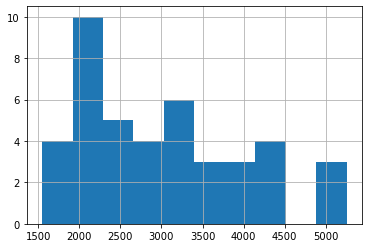

In [114]:
cc['Sales'].hist()

<AxesSubplot:>

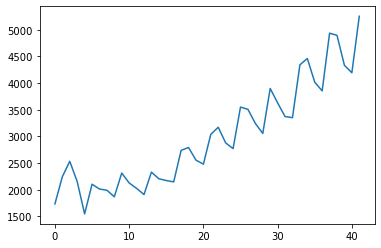

In [115]:
cc.Sales.plot()

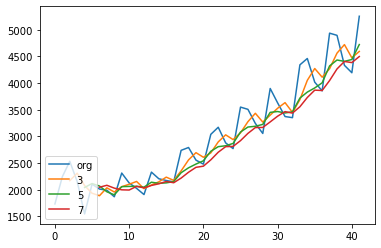

In [116]:
cc.Sales.plot(label="org")
for i in range(3,9,2):
    cc["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

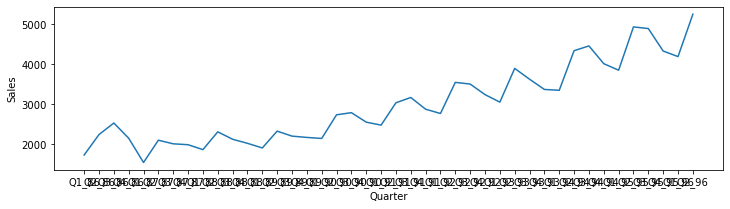

In [117]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarter",y="Sales",data=cc) 

# Preprocessing

In [118]:
quarter=['Q1','Q2','Q3','Q4']
n=cc['Quarter'][0]
n[0:2]

'Q1'

In [119]:
cc['year']=0
cc['quarter']=0
for i in range(42):
    n=cc['Quarter'][i]
    cc['quarter'][i]=n[0:2]
    cc['year'][i]=n[3:]
    dummy=pd.DataFrame(pd.get_dummies(cc['quarter']))
    coco=pd.concat((cc,dummy),axis=1)
    
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']
log_Sales=np.log(cc['Sales'])
coco['log_Sales']=log_Sales

C:\Users\admin\AppData\Local\Temp\ipykernel_13540\3301554785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['quarter'][i]=n[0:2]
C:\Users\admin\AppData\Local\Temp\ipykernel_13540\3301554785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['year'][i]=n[3:]


In [120]:
coco

,Quarter,Sales,year,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,86,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,86,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,86,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,86,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,87,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,87,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,87,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,87,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,88,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,88,Q2,0,1,0,0,10,100,7.746574


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

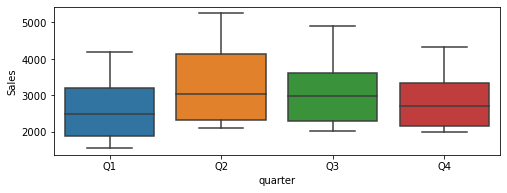

In [121]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data=coco)

<AxesSubplot:xlabel='year', ylabel='Sales'>

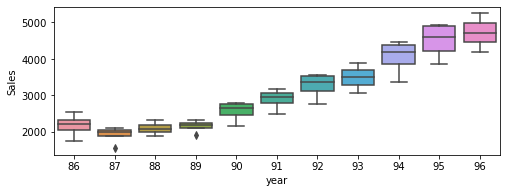

In [122]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="year",y="Sales",data=coco)

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

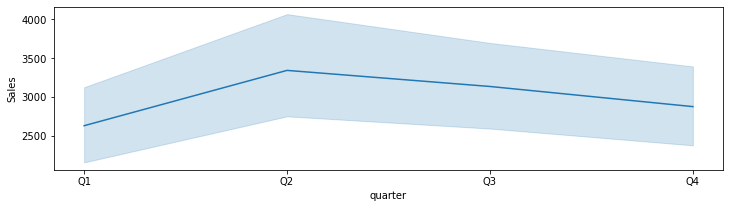

In [123]:
plt.figure(figsize=(12,3))
sns.lineplot(x="quarter",y="Sales",data=coco)

<AxesSubplot:xlabel='quarter', ylabel='year'>

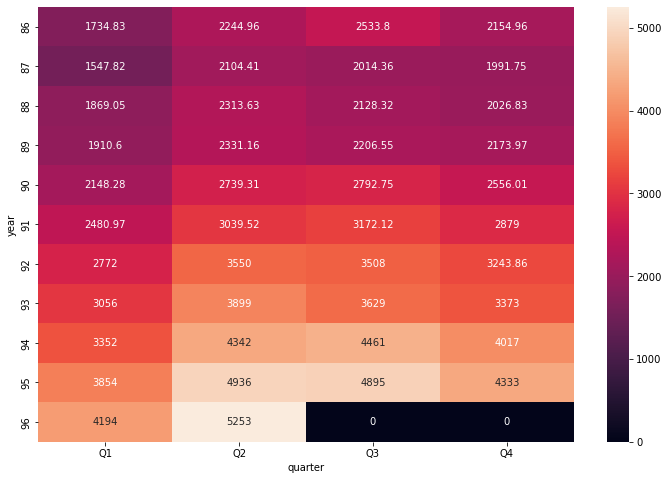

In [124]:
plt.figure(figsize=(12,8))
heatmap_y_quarter = pd.pivot_table(data=coco,values="Sales",index="year",columns="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_quarter,annot=True,fmt="g") #fmt is format of the grid values

In [125]:
## As per above heatmap results, we can see more sales in quarter-2 comparative to other quarters

ACF plots and PACF plots

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


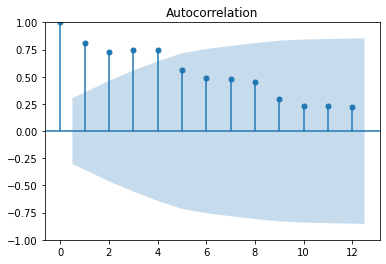

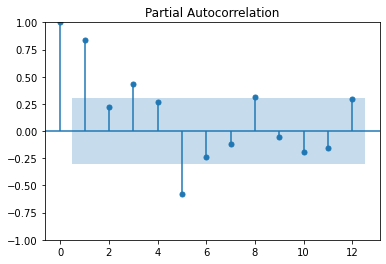

In [126]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coco.Sales,lags=12)
tsa_plots.plot_pacf(coco.Sales,lags=12)
plt.show() 
 

# Splitting data

In [127]:
Train = coco.head(35)
Test = coco.tail(7)

In [128]:
Train

,Quarter,Sales,year,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,86,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,86,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,86,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,86,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,87,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,87,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,87,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,87,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,88,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,88,Q2,0,1,0,0,10,100,7.746574


In [129]:
Test

,Quarter,Sales,year,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
35,Q4_94,4017.0,94,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,95,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,95,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,95,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,95,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,96,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,96,Q2,0,1,0,0,42,1764,8.566555


# Model Based Methods

In [130]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

636.5072930351137

In [131]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

493.34864848422114

In [132]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

511.8117319417574

In [133]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

1861.8704164251742

In [134]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

309.46413951632275

In [135]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1938.9332351966145

In [136]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

339.18746669947956

In [137]:
#Compare the results 

data = {"Model":pd.Series(["linear_model","Exp","Quad","add_sea","add_sea_Quad","Mul_sea","Mul_Add_sea"]),"RMSE":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,Model,RMSE,RMSE_Values
4,add_sea_Quad,rmse_add_sea_quad,309.464140
6,Mul_Add_sea,rmse_Mult_add_sea,339.187467
1,Exp,rmse_Exp,493.348648
2,Quad,rmse_Quad,511.811732
0,linear_model,rmse_linear,636.507293
3,add_sea,rmse_add_sea,1861.870416
5,Mul_sea,rmse_Mult_sea,1938.933235


In [138]:
## As per above results, we can say that Additive Seasonality Qyuadratic model got least RMSE value, 
## We can consider this model for forecasting.

# Predict for new time period

In [139]:
predict_data = pd.read_csv("Predict_new-cc.csv")

In [140]:
predict_data

,Quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1-99,1,0,0,0,53,2809
1,Q2-99,0,1,0,0,54,2916
2,Q3-99,0,0,1,0,55,3025
3,Q4-99,0,0,0,1,56,3136


In [141]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=coco).fit() 

In [142]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data)) 
pred_new

0    7003.176972
1    7792.620735
2    7936.448722
3    7887.931875
dtype: float64

In [143]:
predict_data["forecasted_Sales"]=pred_new

In [144]:
predict_data

,Quarter,Q1,Q2,Q3,Q4,t,t_square,forecasted_Sales
0,Q1-99,1,0,0,0,53,2809,7003.176972
1,Q2-99,0,1,0,0,54,2916,7792.620735
2,Q3-99,0,0,1,0,55,3025,7936.448722
3,Q4-99,0,0,0,1,56,3136,7887.931875


# Data Driven Models

In [145]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

Evaluation Metric MAPE

In [146]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  

Simple Exponential Method

In [147]:
coco["Sales"] = coco["Sales"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)   

16.401824912931044

Holts Method

In [148]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)  

C:\Users\admin\AppData\Local\Temp\ipykernel_13540\2251250397.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


15.891434384453984

Holts winter exponential smoothing with additive seasonality and additive trend

In [149]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

4.821628268559218

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [150]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)  

4.689702828811318

In [151]:
## As per above Data driven model results, we got least MAPE for 
##"Holts winter exponential smoothing with multiplicative seasonality and additive trend" model.


Final Model by combining train and test

In [152]:
coco["Sales"] = coco["Sales"].astype('double')
final_hwe_model_mul_add = ExponentialSmoothing(coco["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
final_pred_hwe_mul_add = final_hwe_model_mul_add.predict(start = coco.index[0],end = coco.index[-1])
MAPE(pred_hwe_mul_add,coco.Sales)  

4.689702828811318

In [153]:
#Forecasting for next 10 time periods
final_hwe_model_mul_add.forecast(12) 

42    5205.840362
43    4778.746744
44    4526.466218
45    5696.346921
46    5625.311534
47    5156.200454
48    4877.070126
49    6129.184104
50    6044.782706
51    5533.654165
52    5227.674033
53    6562.021288
dtype: float64